In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import VarianceThreshold
from sklearn.dummy import DummyClassifier
import statistics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")
print(df.shape)
test_df=pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/test_data.csv")
print(test_df.shape)
df=df.drop(['travelled_more_than_5mins_for_offer','car'],axis=1)
print(df.shape)
test_df=test_df.drop(["travelled_more_than_5mins_for_offer",'car'],axis=1)
print(test_df.shape)


(12379, 31)
(5305, 30)
(12379, 29)
(5305, 28)


In [3]:
df_features=df.columns[:-1].values
df_features

array(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer',
       'Restaur_spend_less_than20', 'Marital Status', 'restaurant type',
       'age', 'Prefer western over chinese',
       'travelled_more_than_25mins_for_offer', 'no_visited_bars',
       'gender', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)',
       'temperature', 'Restaur_spend_greater_than20', 'Travel Time',
       'Climate', 'drop location', 'Prefer home food'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  no_visited_bars                       12286 non-null  object
 11  gender                      

In [5]:
df['Offer Accepted'].value_counts()

Yes    6994
No     5385
Name: Offer Accepted, dtype: int64

Text(0, 0.5, 'Count')

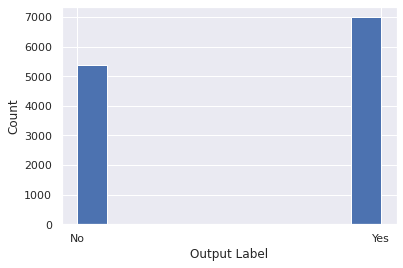

In [6]:
sns.set()
df['Offer Accepted'].hist()
plt.xlabel('Output Label')
plt.ylabel('Count')

In [7]:
oe=OrdinalEncoder()
train_ordinal_encoded_df=oe.fit_transform(df)
np.shape(train_ordinal_encoded_df)

(12379, 29)

In [8]:
CT = ColumnTransformer([
        ('impute_no_of_cold_drinks',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[2]),
        ('impute_res_less_20',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[4]),
         ('impute_visited_bars',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[10]),
         ('impute_take_aways',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[17]),
         ('impute_res_greater_20',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[23])
    ],remainder='passthrough')
pipe=Pipeline([('CT',CT),('MinMax',MinMaxScaler()),])
transformed_data =pipe.fit_transform(train_ordinal_encoded_df)

In [9]:
transformed_data
np.shape(transformed_data)

(12379, 29)

In [10]:
new_df = pd.DataFrame(transformed_data, columns = ['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer',
       'Restaur_spend_less_than20', 'Marital Status', 'restaurant type',
       'age', 'Prefer western over chinese',
       'travelled_more_than_25mins_for_offer',
        'no_visited_bars', 'gender',
        'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)',
       'temperature', 'Restaur_spend_greater_than20', 'Travel Time',
       'Climate', 'drop location', 'Prefer home food', 'Offer Accepted'])

In [11]:
new_df_1=new_df.drop('Offer Accepted',axis=1)
new_label_1=new_df['Offer Accepted'].copy()
new_df_1.shape

(12379, 28)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(new_df_1,new_label_1,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9903, 28), (2476, 28), (9903,), (2476,))

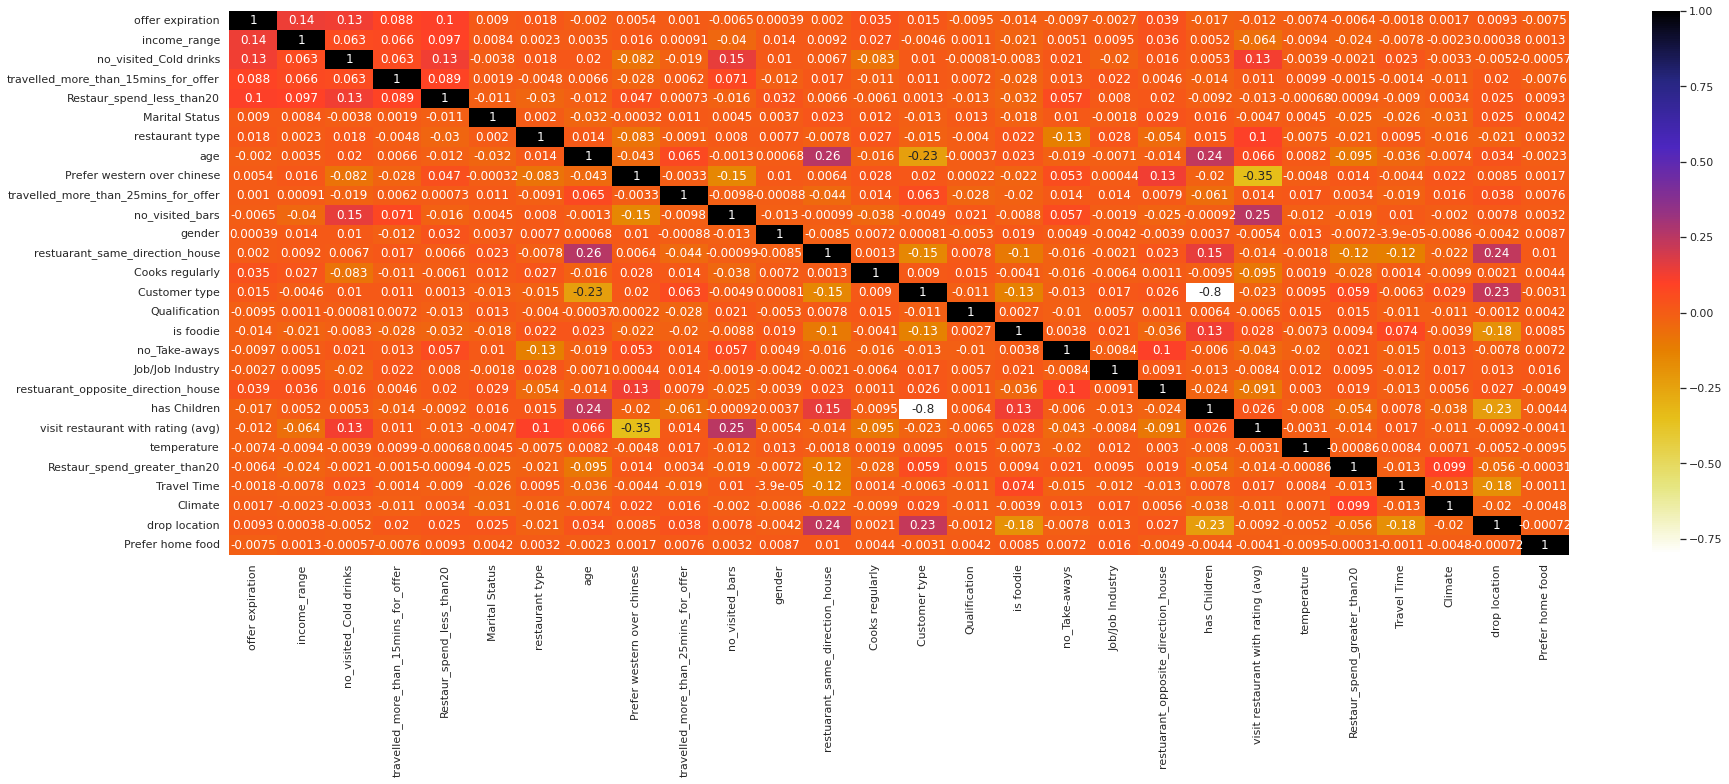

In [13]:
correlation_matrix=X_train.corr()
np.shape(correlation_matrix)
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:

columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if np.abs(correlation_matrix.iloc[i,j]) >= 0.5:
            if columns[j]:
                columns[j] = False
                
important_columns = X_train.columns[columns]
important_columns.shape

(27,)

In [15]:
X_train=X_train[important_columns]
X_test=X_test[important_columns]
test_df=test_df[important_columns]
test_df.shape
new_columns=test_df.columns

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
guess= statistics.mode(y_train)
y_pred_base=[guess]*len(y_test)
score=accuracy_score(y_test,y_pred_base)
int(score)

0

In [18]:
""""
lf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
knn=KNeighborsClassifier()
k_interval=list(range(1,100))
param_grid=dict(n_neighbors=k_interval)
grid_search=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
grid_prediction=grid_search.predict(X_test)
validation_predict=grid_prediction
score=accuracy_score(validation_predict,y_test)
print(score)"""

'"\nlf = KNeighborsClassifier(n_neighbors = 5)\nclf.fit(X_train, y_train)\nclf.score(X_test,y_test)\nknn=KNeighborsClassifier()\nk_interval=list(range(1,100))\nparam_grid=dict(n_neighbors=k_interval)\ngrid_search=GridSearchCV(knn,param_grid,cv=10,scoring=\'accuracy\',verbose=1,n_jobs=-1)\ngrid_search.fit(X_train,y_train)\nprint(grid_search.best_params_)\ngrid_prediction=grid_search.predict(X_test)\nvalidation_predict=grid_prediction\nscore=accuracy_score(validation_predict,y_test)\nprint(score)'

In [19]:
"""grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1)
logreg_cv.fit(X_train,y_train)
prediction=logreg_cv.predict(X_test)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
score=accuracy_score(y_test,prediction)
score"""

'grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge\nlogreg=LogisticRegression()\nlogreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1)\nlogreg_cv.fit(X_train,y_train)\nprediction=logreg_cv.predict(X_test)\nprint("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)\nprint("accuracy :",logreg_cv.best_score_)\nscore=accuracy_score(y_test,prediction)\nscore'

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      5305 non-null   object
 1   income_range                          5305 non-null   object
 2   no_visited_Cold drinks                5215 non-null   object
 3   travelled_more_than_15mins_for_offer  5305 non-null   int64 
 4   Restaur_spend_less_than20             5244 non-null   object
 5   Marital Status                        5305 non-null   object
 6   restaurant type                       5305 non-null   object
 7   age                                   5305 non-null   object
 8   Prefer western over chinese           5305 non-null   int64 
 9   travelled_more_than_25mins_for_offer  5305 non-null   int64 
 10  no_visited_bars                       5255 non-null   object
 11  gender                        

In [21]:
oe=OrdinalEncoder()
test_ordinal_encoded_df=oe.fit_transform(test_df)
CT = ColumnTransformer([
        ('impute_no_of_cold_drinks',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[2]),
        ('impute_res_less_20',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[4]),
         ('impute_visited_bars',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[10]),
         ('impute_take_aways',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[17]),
         ('impute_res_greater_20',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),[22])
       
    ],remainder='passthrough')
pipe=Pipeline([('CT',CT),('MinMax',MinMaxScaler()),])
transformed_test_data =pipe.fit_transform(test_ordinal_encoded_df)
np.shape(transformed_test_data)
type(transformed_test_data)

numpy.ndarray

In [22]:
new_test_df = pd.DataFrame(transformed_test_data, columns = new_columns )
#print(type(new_test_df))
#test_grid_predict=grid_search.predict(new_test_df)
#test_grid_predict
#test_grid_predict=logreg_cv.predict(new_test_df)
#test_grid_predict



In [23]:
new_test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      5305 non-null   float64
 1   income_range                          5305 non-null   float64
 2   no_visited_Cold drinks                5305 non-null   float64
 3   travelled_more_than_15mins_for_offer  5305 non-null   float64
 4   Restaur_spend_less_than20             5305 non-null   float64
 5   Marital Status                        5305 non-null   float64
 6   restaurant type                       5305 non-null   float64
 7   age                                   5305 non-null   float64
 8   Prefer western over chinese           5305 non-null   float64
 9   travelled_more_than_25mins_for_offer  5305 non-null   float64
 10  no_visited_bars                       5305 non-null   float64
 11  gender           

In [24]:
'''clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
#clf.score(X_test,y_test)
final_pred=clf.predict(new_test_df)
#Offer_accepted'''

"clf = SVC(kernel='linear')\nclf.fit(X_train, y_train)\n#clf.score(X_test,y_test)\nfinal_pred=clf.predict(new_test_df)\n#Offer_accepted"

In [25]:
'''from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
estimator = []
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
final_pred=vot_hard.predict(new_test_df)
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
final_pred'''


'from sklearn.ensemble import VotingClassifier\nfrom sklearn.metrics import accuracy_score\nestimator = []\nestimator.append((\'SVC\', SVC(gamma =\'auto\', probability = True)))\nestimator.append((\'DTC\', DecisionTreeClassifier()))\nvot_hard = VotingClassifier(estimators = estimator, voting =\'soft\')\nvot_hard.fit(X_train, y_train)\ny_pred = vot_hard.predict(X_test)\nfinal_pred=vot_hard.predict(new_test_df)\nscore = accuracy_score(y_test, y_pred)\nprint("Soft Voting Score % d" % score)\nfinal_pred'

In [26]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(random_state=43)  
param_grid = { 
    'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
#classifier.fit(X_train, y_train)
prediction=CV_rfc.predict(X_test)
final_pred=CV_rfc.predict(new_test_df)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)
print(final_pred)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 25}
RandomForestClassifier(max_depth=7, n_estimators=25, random_state=43)
[1. 1. 0. ... 1. 1. 1.]


In [27]:
'''abc = AdaBoostClassifier(n_estimators=110,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
final_pred=abc.predict(new_test_df)'''

'abc = AdaBoostClassifier(n_estimators=110,\n                         learning_rate=1)\nmodel = abc.fit(X_train, y_train)\nfinal_pred=abc.predict(new_test_df)'

In [28]:
Final_1 = pd.DataFrame(final_pred, columns = ['Offer Accepted'] )
Final_1.index.name
Final_1.index.name='id'
Final_1['Offer Accepted']=Final_1['Offer Accepted'].replace({1.0: 'Yes', 0.0: 'No'})
#Final_1.index.name
Final_1.to_csv(f"Submission1_file.csv")
Final_1


,Offer Accepted
id,
0,Yes
1,Yes
2,No
3,No
4,Yes
...,...
5300,Yes
5301,Yes
5302,Yes
